In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Important Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Data Preprocessing & Augmentation**






In [ ]:
data_dir = "/content/drive/MyDrive/Animal Classification/dataset"

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.3, 1.0]
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


# Build the Model (Transfer Learning with MobileNetV2)

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(15, activation='softmax')  # 15 classes
])


# Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train the Model

In [52]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 797ms/step - accuracy: 0.4315 - loss: 1.9489 - val_accuracy: 0.7232 - val_loss: 0.9180
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 727ms/step - accuracy: 0.8120 - loss: 0.6141 - val_accuracy: 0.7415 - val_loss: 0.8451
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 624ms/step - accuracy: 0.8471 - loss: 0.5105 - val_accuracy: 0.7598 - val_loss: 0.7450
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 641ms/step - accuracy: 0.8671 - loss: 0.4197 - val_accuracy: 0.7572 - val_loss: 0.7366
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 652ms/step - accuracy: 0.8887 - loss: 0.3391 - val_accuracy: 0.7937 - val_loss: 0.7015
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 633ms/step - accuracy: 0.8959 - loss: 0.3452 - val_accuracy: 0.8172 - val_loss: 0.6335
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 627ms/step - accuracy: 0.9012 - loss: 0.2930 - val_accuracy: 0.7963 - val_loss: 0.7341
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 667ms/step - accuracy: 0.9209 - loss: 0.2589 - 

# Evaluate & Visualize Results

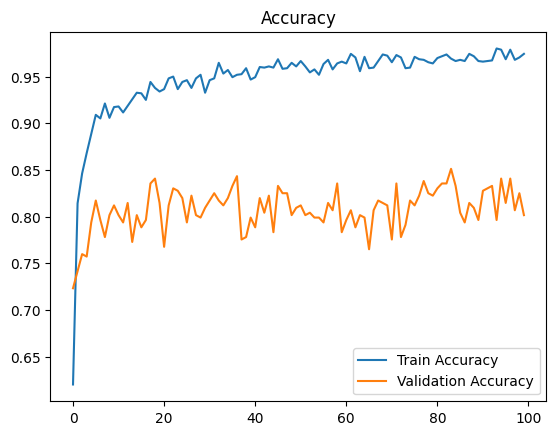

In [53]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

# Save the Model

In [54]:
model.save('/content/drive/MyDrive/animal_classifier_model.h5')

# Predicting  Images

In [55]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/Animal Classification/dataset/Cat/Cat_3_3.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_names = list(train_generator.class_indices.keys())
print("Predicted Class:", class_names[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Cat


In [56]:
model.save('/content/drive/MyDrive/animal_classifier_model_v2.h5')


In [57]:

from keras.saving import save_model
save_model(model, "animal_classifier_model.keras")